In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np

In [13]:
x = pd.read_csv("/content/drive/MyDrive/df_featured_train.csv",low_memory=False)
y = pd.read_csv("/content/drive/MyDrive/y_featured_series.csv",low_memory=False)

In [23]:
x.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'IpAddress', 'AccountSid', 'AccountUpn',
       'NetworkMessageId', 'CountryCode', 'Day', 'Hour'],
      dtype='object')

In [5]:
y.shape

(9465497, 1)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
# Train the model
rf_clf.fit(X_train, y_train)
# Make predictions
y_pred = rf_clf.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7808404204743542
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.98      0.80    823087
           1       0.95      0.52      0.67    406186
           2       0.98      0.69      0.81    663827

    accuracy                           0.78   1893100
   macro avg       0.87      0.73      0.76   1893100
weighted avg       0.84      0.78      0.78   1893100

Confusion Matrix:
[[809517   7372   6198]
 [189066 211703   5417]
 [202820   4018 456989]]



Evaluating XGBoost...
Accuracy: 0.9192367017061962
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92    823087
           1       0.94      0.85      0.89    406186
           2       0.94      0.91      0.93    663827

    accuracy                           0.92   1893100
   macro avg       0.92      0.91      0.91   1893100
weighted avg       0.92      0.92      0.92   1893100



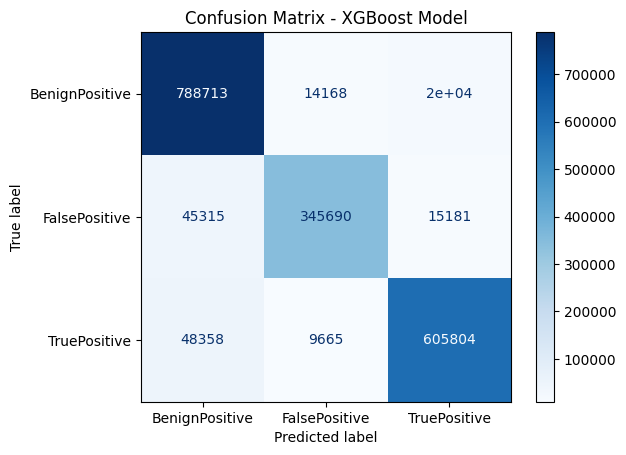

In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model_xgb = XGBClassifier(random_state=42)

#XGBOOST
print(f"\nEvaluating XGBoost...")

# Fit the model
model_xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = model_xgb.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost Model')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Evaluating LGBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.912124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2745
[LightGBM] [Info] Number of data points in the train set: 7572397, number of used features: 15
[LightGBM] [Info] Start training from score -0.834312
[LightGBM] [Info] Start training from score -1.538521
[LightGBM] [Info] Start training from score -1.046602
Accuracy: 0.8977259521419894
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90    823087
           1       0.93      0.79      0.86    406186
           2       0.94      0.88      0.91    663827

    accuracy                           0.90   1893100
   macro avg       0.91      0.88      0.89   1893100
weighted avg       0.90      0.90      0.90   1893100



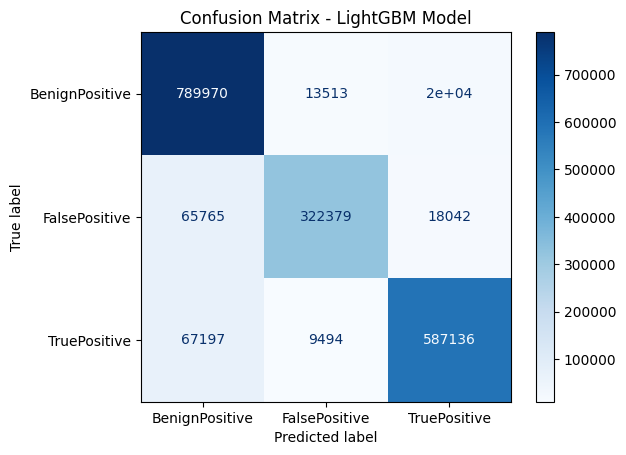

In [19]:
from lightgbm import LGBMClassifier
model_lgb = LGBMClassifier(random_state = 42)

#LGBoost
print(f"\nEvaluating LGBoost...")

# Fit the model
model_lgb.fit(X_train, y_train)

# Predict on test data
y_pred_lgb = model_lgb.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_lgb))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lgb)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - LightGBM Model')
plt.show()

In [22]:
###Best model XGB Classifier

from joblib import dump

# Save the model
dump(model_xgb, 'xgboost_model.joblib')



['xgboost_model.joblib']

MODEL EVALUATION

In [24]:
# List of columns to fetch
columns_to_fetch = [
    'Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
    'Category', 'EntityType', 'IpAddress', 'AccountSid', 'AccountUpn',
    'NetworkMessageId', 'CountryCode', 'Day', 'Hour', 'IncidentGrade'
]

# Read the CSV file with only the specified columns
df_test = pd.read_csv("/content/drive/MyDrive/cleaned_df_test.csv", usecols=columns_to_fetch, low_memory=False)

# Display the filtered DataFrame
print(df_test.head())


              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0  1245540519230    657       11767    87199         524         563   
1  1400159342154      3       91158   632273           2           2   
2  1279900255923    145       32247   131719        2932       10807   
3    60129547292    222       15294   917686           0           0   
4   515396080539    363        7615     5944          27          18   

   Category  IncidentGrade  EntityType  IpAddress  AccountSid  AccountUpn  \
0        11              0          28     360606        2610        3699   
1         1              0          15     360606      441377      673934   
2        11              0          23     360606      441377      673934   
3        10              1           7     360606      441377      673934   
4         5              0          28     360606      133549      673934   

   NetworkMessageId  CountryCode  Day  Hour  
0            529644          242    4    22  
1           

In [25]:
x1 = df_test[['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
    'Category', 'EntityType', 'IpAddress', 'AccountSid', 'AccountUpn',
    'NetworkMessageId', 'CountryCode', 'Day', 'Hour']]
y1 = df_test["IncidentGrade"]

In [26]:
from joblib import load

# Load the model
model_xgb_loaded = load('xgboost_model.joblib')

# Verify by checking the model
print(model_xgb_loaded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [27]:
y_pred_new = model_xgb_loaded.predict(x1)

In [28]:
print("Accuracy:", accuracy_score(y1, y_pred_new))
print("Classification Report:")
print(classification_report(y1, y_pred_new))

Accuracy: 0.8883301574198724
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90   1752895
           1       0.87      0.81      0.84    902664
           2       0.92      0.90      0.91   1492329

    accuracy                           0.89   4147888
   macro avg       0.89      0.88      0.88   4147888
weighted avg       0.89      0.89      0.89   4147888



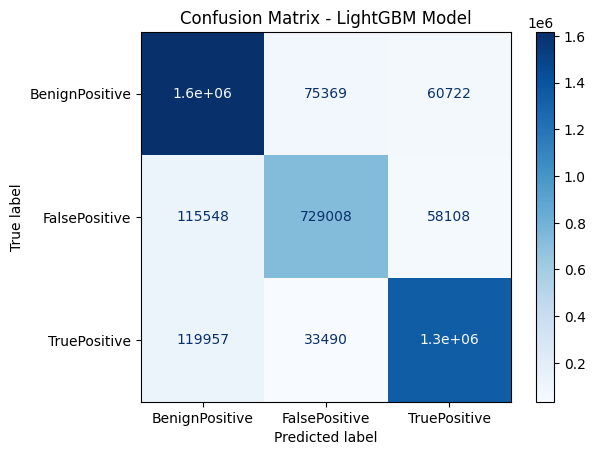

In [30]:
# Generate the confusion matrix
cm = confusion_matrix(y1, y_pred_new)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - LightGBM Model')
plt.show()